In [1]:
##############################################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
%matplotlib widget

from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="400px"
opt.scrollCollapse=True
opt.paging=False
##############################################################################


pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>

In [ ]:
pgm.get_available_models()

In [ ]:
Markdown(pgm.get_available_model_documentation('CHIMES'))

In [ ]:
hub=pgm.Hub('CHIMES0',preset='SimpleTri',verb=True)
hub.set_dparam(**{'Tmax':10,'dt':0.01})
hub.run()
hub.plot()

In [ ]:
display(*hub.get_summary())

In [ ]:
hub.get_fieldsproperties()

In [ ]:
R=hub.dparam['nu0']
R

In [ ]:
#plt.close('all')
sectors = hub.dparam['Nprod']['list']
for sector in sectors :
    pgm.plots.plotnyaxis(hub, y=[[['inflation', sector],
                                  ['inflationMarkup', sector],
                                  ['inflationdotV', sector], ],
                                 [['dotV',sector]],
                                 [['c',sector],
                                  ['p',sector]],
                                 [['pi',sector],
                                  ['kappa',sector]],
                                 [['employment',sector],
                                  ['u',sector],
                                  ]],)
    pgm.plots.repartition(hub,
                          ['pi','omega','Mxi','Mgamma','rd','reloverinvest','reldotv'],
                          sign= [1,1,1,1,1,1,-1],
                          sector=sector,
                          title=f'Expected relative budget $\pi$ for sector {sector}')
    pgm.plots.repartition(hub,['Minter','Minvest','C','dotV'],
                          ref='Y',
                          sector=sector,
                          title=f'Physical Fluxes for sector {sector}')
    pgm.plots.repartition(hub,['MtransactY','MtransactI','wL','pC','rD'],
                          sign=[1, 1, 1, -1, 1],
                          ref='dotD',
                          sector=sector,
                          title=f'Monetary Fluxes for sector {sector}',
                          removetranspose=True)

In [ ]:
sectors = hub.dparam['Nprod']['list']
pgm.plots.plotnyaxis(hub,y=[#['employmentAGG']+[['employment',sector] for sector in sectors],
                            [['omega',sector] for sector in sectors],
                            [['pi',sector] for sector in sectors],
                            [['gamma',sector] for sector in sectors],
                            [['xi',sector] for sector in sectors],
                            [['rd',sector] for sector in sectors],
                            #[['inflation',sector] for sector in sectors],
                            #[['d',sector] for sector in sectors],
                            ],
                            tini=40,
                            tend=50,
                            title='All',
                            loc='upper left')

In [ ]:


for sector in sectors:
    pgm.plots.plotnyaxis(hub,y=[[['inflation', sector],
                                ['inflationMarkup', sector],
                                ['inflationdotV', sector], ],
                                [['dotV',sector]],
                                [['V',sector]],
                                #[['u',sector]],
                                ],
                                tini=80,tend=100,
                                title=sector)

In [ ]:
hub=pgm.Hub('CHIMES0')
hub.set_preset('SimpleTri')
hub.run()


In [ ]:
hub.run()

# STARTING AS A GOODWIN

In [42]:
hub=pgm.Hub('CHIMES0')
GOODWIN_PRESET= { 
    ###
    'Tmax':100, 
    'Tini':0, 
    'dt': 0.01, 
    'Nprod': [''], 
    'nx': [''], 
    'nr': [''],

    'alpha':0.025, 
    'n':0.02, 
    'delta':0.005, 

    'gammai':0,
    'r':0.03, 
    'phinull':0.1, 

    'Xi': 1, 
    'Gamma': 0.1, 
    'sigma': 1, 
    'z' :1, 
    'b' :1, 
    'nu0': 3, 
    'eta': 0, 
    'mu0': 1, 
    'chi': 0, 
    'Cpond': 1, 
    'Delta': 0, 
    'philinConst': -0.292, 
    'philinSlope':  0.469, 
    #'phinull':0.1,
    'k0':1,

    'D':0, 
    'Dh':0, 
    'V':1, 
    'K':2, 
    'p':1, 
    'w0':0.7, 
    'u0':1, 
    'a0':3, 
    'N':1, 
}
hub=pgm.Hub('CHIMES0')
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.run()

The following fields are defined in the model but not it the library :
	- statevar: ['GammaY', 'Idelta', 'Ilever']
The following fields are identified as parameters :
	- independant : ['delta', 'sigma', 'z', 'b', 'nu0', 'eta', 'mu0', 'chi', 'Cpond', 'Delta', 'philinConst', 'philinSlope', 'k0']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['ROC', 'Kdelta', 'GammaY', 'Minter', 'Minvest', 'Shareholding', 'rDh', 'g', 'reldotv', 'reloverinvest']
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['w', 'u', 'nu', 'Mgamma', 'Mxi', 'Y', 'Kdelta', 'GammaY', 'Minter', 'MtransactY', 'rD', 'rDh', 'a', 'xi', 'omega', 'gamma', 'rd', 'pi', 'ROC', 'c', 'mu', 'inflationMarkup', 'L', 'wL', 'Shareholding', 'Idelta', 'W', 'kappa', 'employment', 'reloverinvest', 'C', 'pC', 'Ilever', 'I', 'employmentAGG', 'Phillips', 'basket', 'Ir', 'dotV', 'Minvest', 'MtransactI', 'dotD', 'g

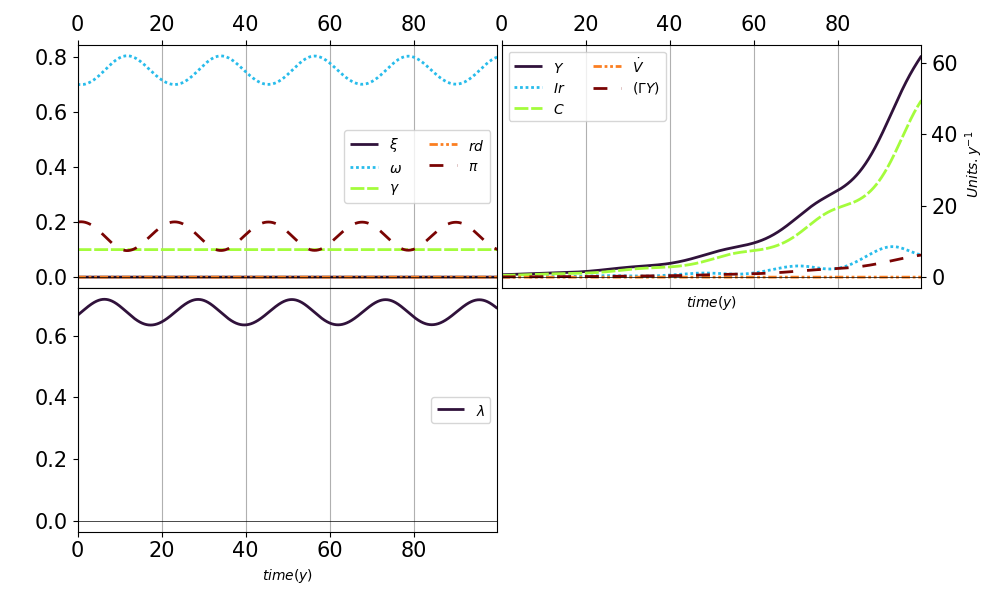

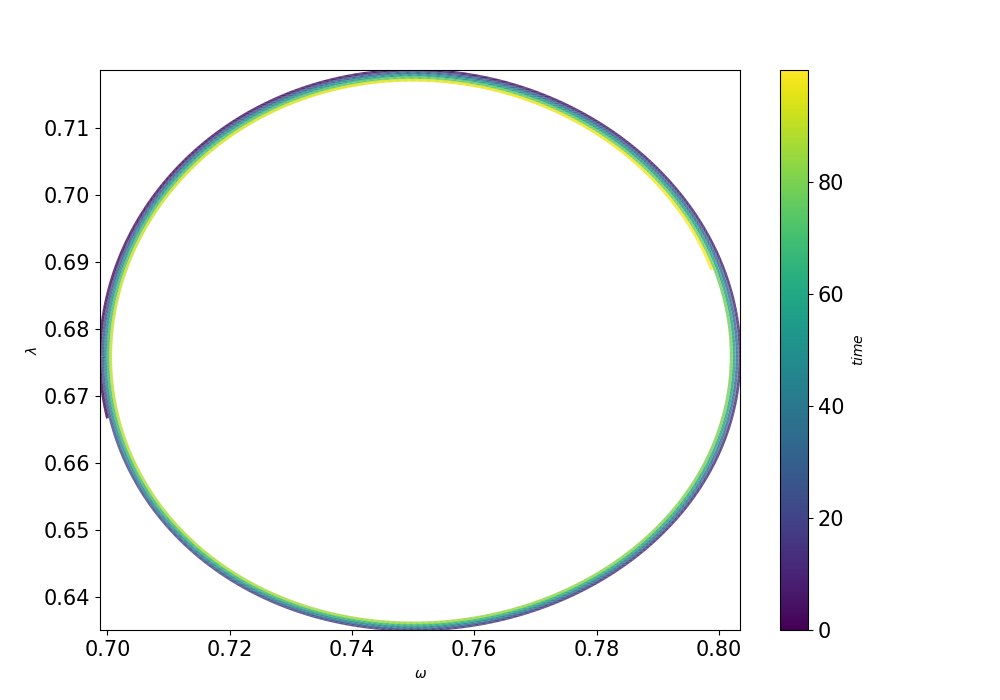

In [43]:
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi',
                      'C','Ir','Y','GammaY','dotV',],
         separate_variables={'':'employment'}) #
pgm.plots.XY(hub,'omega','employment',color='time')
    

## Injecting Inflation

In [54]:
hub=pgm.Hub('CHIMES0',verb=False)
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.set_dparam(**{'mu0':1.5,
                  'eta':0.1})
hub.run()


Changing Fields: ['mu0', 'eta']
Identified mu0 as a value change on all axes
Identified eta as a value change on all axes

time step 828 / 10000
time step 1606 / 10000
time step 2391 / 10000
time step 3171 / 10000
time step 4027 / 10000
time step 4933 / 10000
time step 5784 / 10000
time step 6565 / 10000
time step 7373 / 10000
time step 8221 / 10000
time step 9096 / 10000
time step 9960 / 10000
time step 10000 / 10000


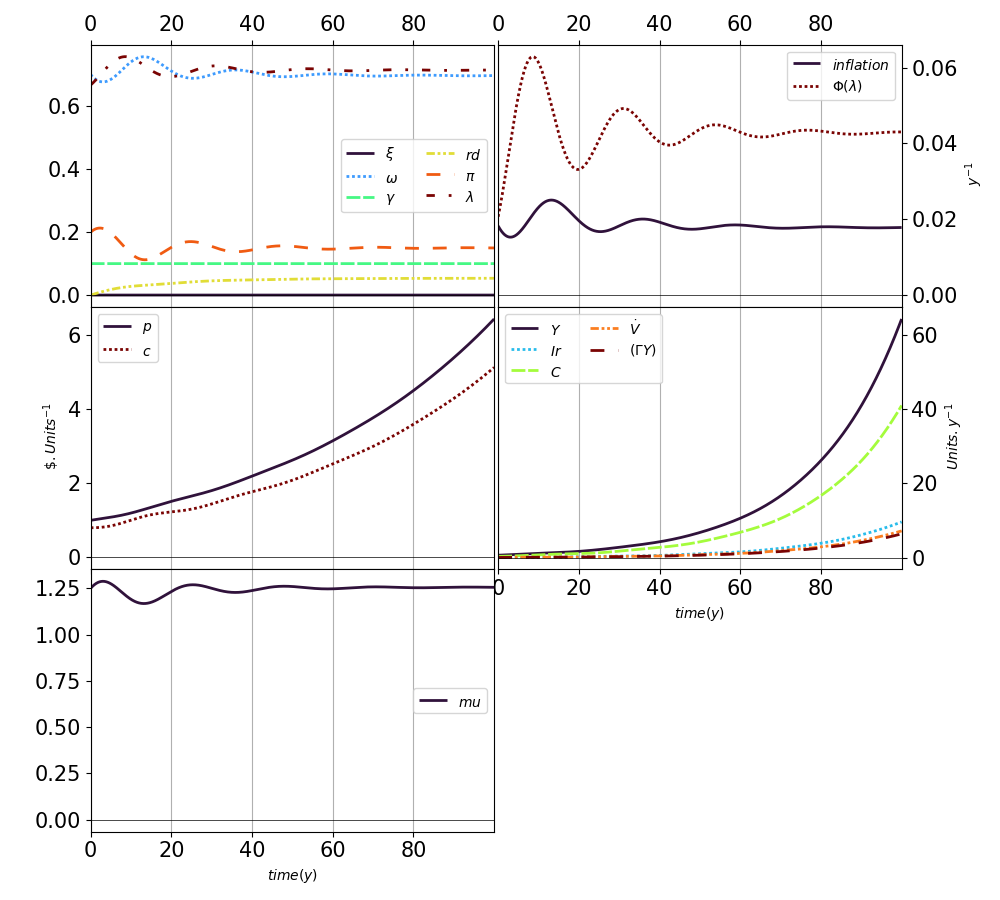

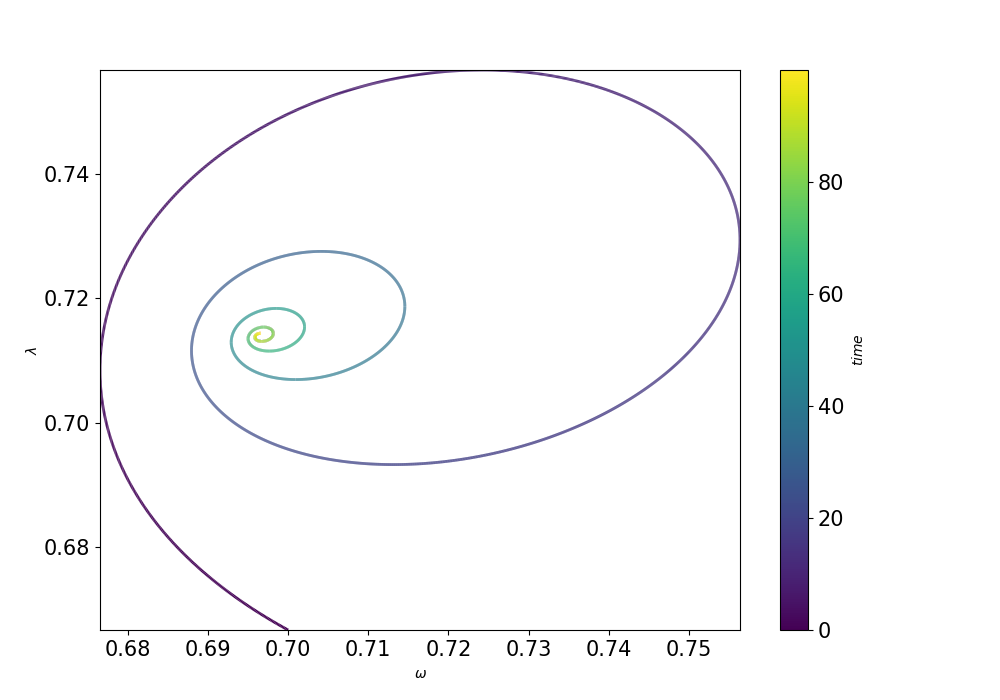

In [55]:
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi',
                      'C','Ir','Y','GammaY','dotV','p','c','inflation','mu','Phillips'],
         separate_variables={'':'mu'}) #
pgm.plots.XY(hub,'omega','employment',color='time')

## Getting into GOODWIN-KEEN 

$C:=Y(1-\Gamma)-I $

$C=Y(1-\Gamma- \kappa(\pi) - \xi)$

On Goodwin-Keen approach.

With Ponderation of income : 
$C= C^{pond}(wL/p)$

$C= C^{pond} Y \omega$

Having both induces : $C^{pond} =\dfrac{1- \kappa(\pi) - \xi-\Gamma}{ \omega}$


In [77]:
hub=pgm.Hub('CHIMES0',verb=False)
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.set_dparam(**{'k0':2,})
hub.run()


Changing Dimensions: ['Tmax']
Changing Fields: ['k0']
Identified k0 as a value change on all axes

time step 851 / 50000
time step 1629 / 50000
time step 2381 / 50000
time step 3181 / 50000
time step 3879 / 50000
time step 4652 / 50000
time step 5540 / 50000
time step 6324 / 50000
time step 7115 / 50000
time step 7906 / 50000
time step 8711 / 50000
time step 9522 / 50000
time step 10317 / 50000
time step 11066 / 50000
time step 11821 / 50000
time step 12605 / 50000
time step 13468 / 50000
time step 14285 / 50000
time step 15011 / 50000
time step 15804 / 50000
time step 16550 / 50000
time step 17326 / 50000
time step 18094 / 50000
time step 18863 / 50000
time step 19640 / 50000
time step 20424 / 50000
time step 21143 / 50000
time step 21904 / 50000
time step 22690 / 50000
time step 23444 / 50000
time step 24196 / 50000
time step 25073 / 50000
time step 25833 / 50000
time step 26659 / 50000
time step 27427 / 50000
time step 28210 / 50000
time step 28952 / 50000
time step 29739 / 50000
t

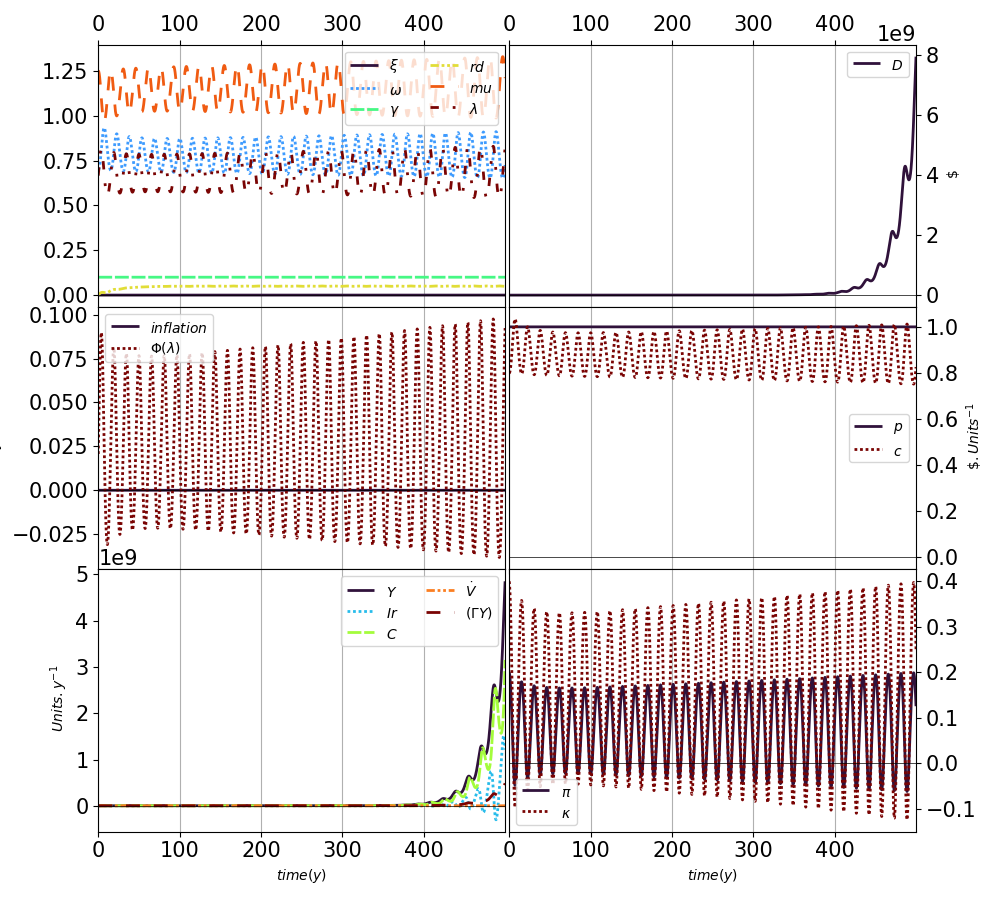

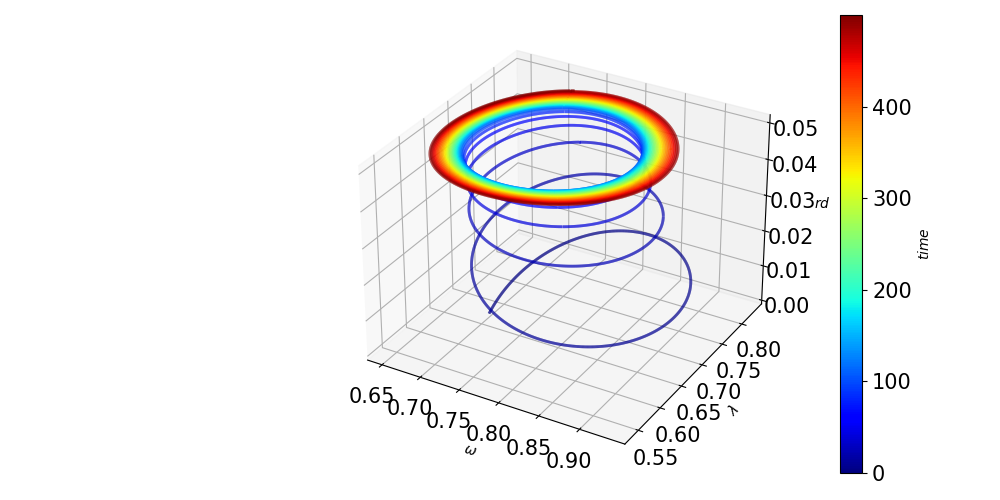

In [78]:
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi','kappa','rd',
                      'C','Ir','Y','GammaY','dotV','p','c','inflation','mu','Phillips','D','Cpond','dotV'],
         separate_variables={'':['Cpond','kappa','pi']}) 
pgm.plots.XYZ(hub,'omega','employment','rd',color='time')